# Troll tweets

In [1]:
import pathlib
import sklearn
import numpy
import nltk
import pandas as pd
import glob
import os
import advertools as adv
import matplotlib.pyplot as plt

In [2]:
path = '../russian-troll-tweets/'                    # use your path

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print("Loaded:", filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

Loaded: ../russian-troll-tweets/IRAhandle_tweets_4.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_5.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_7.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_6.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_2.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_3.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_1.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_8.csv
Loaded: ../russian-troll-tweets/IRAhandle_tweets_9.csv


In [3]:
english_only =  frame.loc[frame['language'] == 'English']  

In [4]:
no_retweets = english_only.loc[(english_only['post_type'] != 'RETWEET') & (english_only['post_type'] != 'QUOTE_TWEET') ]

In [5]:
right_trolls = no_retweets.loc[no_retweets['account_category'] == 'RightTroll']
left_trolls = no_retweets.loc[no_retweets['account_category'] == 'LeftTroll']
hashtag_gamer = no_retweets.loc[no_retweets['account_category'] == 'HashtagGamer']
fake_news = no_retweets.loc[no_retweets['account_category'] == 'NewsFeed']

#TODO run general analysis Tweet amounts time stamps over all sentiments general ideas


## Right Trolls

In [6]:
r_hashtag_summary = adv.extract_hashtags(right_trolls['content'])


In [7]:
r_hashtag_summary['overview']

{'num_posts': 406192,
 'num_hashtags': 285550,
 'hashtags_per_post': 0.7029926734155276,
 'unique_hashtags': 16532}

In [8]:
r_hashtag_summary['hashtag_freq'][:15]

[(0, 248253),
 (1, 75984),
 (2, 60117),
 (3, 11659),
 (4, 4526),
 (5, 2293),
 (6, 1202),
 (7, 722),
 (8, 890),
 (9, 264),
 (10, 153),
 (11, 86),
 (12, 31),
 (13, 3),
 (14, 7)]

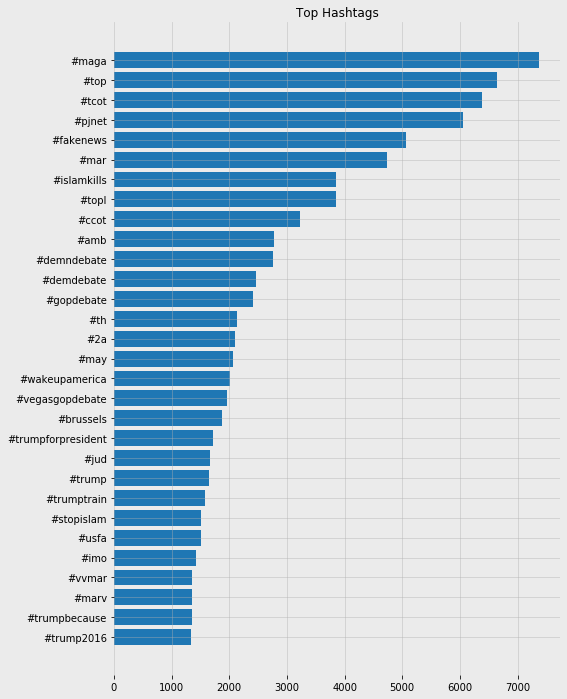

In [9]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in r_hashtag_summary['top_hashtags'][:][:30]][::-1],
         [x[1] for x in r_hashtag_summary['top_hashtags'][:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [10]:
r_emoji_summary = adv.extract_emoji(right_trolls['content'])

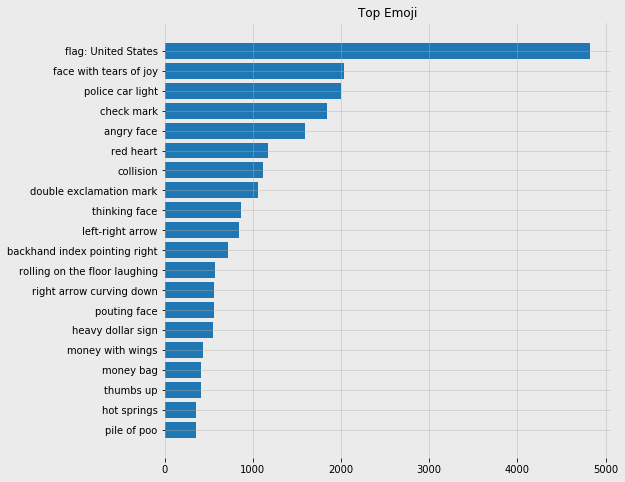

In [11]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in r_emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in r_emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [12]:
r_mention_summary = adv.extract_mentions(right_trolls['content'])

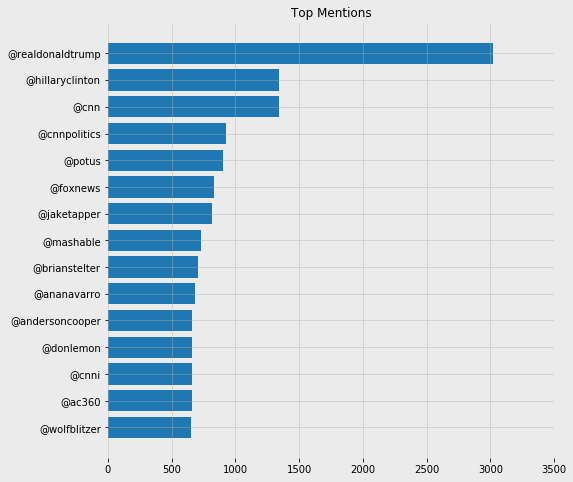

In [13]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in r_mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in r_mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 4000, 500))
plt.gca().set_frame_on(False)

In [14]:
r_question_summary = adv.extract_questions(right_trolls['content'])

In [15]:
[(i,x) for i, x in  enumerate(r_question_summary['question_text']) if x][:15]




[(48, ["Did you ever wonder what's the worst breakup text ever typed?"]),
 (67, ['Why compare yourself with others?']),
 (91, ['Mad Much?']),
 (98, ["Well, that's your opinion, isn't it?"]),
 (108, ['How Can You Still Call That A Skirt??']),
 (110, ['WHAT THE????']),
 (133, ['Have u ever wanted to kiss someone really bad?']),
 (192, ['Blame BILL DEBLASIO, worst man ever, maybe now he will be fired?']),
 (197, ['Can we learn, this time?', 'Or do we need another lesson?']),
 (209, ['Drugs are illegal, so what?']),
 (213, ["What about Obama's and Saudi's friendship?"]),
 (224,
  ['#ILoveObama Obama is ready to give money to other countries and what about his own?']),
 (248, ['The #conservative #Paglia?']),
 (257, ['Until they started to do it first?']),
 (258, ['#ObamaLovesAmerica Can you imagine ISIS tweets??'])]

### NER

In [142]:
from pprint import pprint ### needed to print python data more elegantly
import nltk 
import spacy

model="en_core_web_sm"

nlp = spacy.load(model)

r_entity_list = []

i = 0
for index, row in right_trolls.iterrows():
    if i % 1000 == 0:
        print(i)
    
        
#     print (index , row["content"]) 
    doc = nlp(row["content"])
    for ent in doc.ents:
#         print(ent.text.lower(), ent.label_)
        r_entity_list.append((ent.text.lower(), ent.label_, i ))
    
    i+= 1


# print(r_entity_list)        

r_entities_df = pd.DataFrame(data=r_entity_list , columns = ['Entity', 'Type', 't_index'])
r_entities_df
# from nltk.chunk import ne_chunk

# tokens = nltk.word_tokenize(test_string)
# tokens_pos_tagged = nltk.pos_tag(tokens)
# tokens_pos_tagged_and_named_entities = ne_chunk(tokens_pos_tagged)
# print()
# print('ORIGINAL SENTENCE', sentence)
# print('NAMED ENTITY RECOGNITION OUTPUT', tokens_pos_tagged_and_named_entities)

    
    
    
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


Entity    Type  t_index
0                tom hardy  PERSON        1
1                    venom  PERSON        1
2       joseph wood krutch  PERSON        3
3                 universe     ORG        5
4              craigmorgan  PERSON        9
...                    ...     ...      ...
674481            #quote #   MONEY   406184
674482                 nyc     ORG   406189
674483           yesterday    DATE   406189
674484               trump  PERSON   406191
674485             hillary  PERSON   406192

[674486 rows x 3 columns]

In [143]:
r_entities_df.to_csv('r_entities_new.csv')

In [144]:
r_entities_df = pd.read_csv('r_entities_new.csv')  





In [145]:
r_entities_df = r_entities_df.replace('donald trump', 'trump', regex=False)
r_entities_df = r_entities_df.replace('hillary clinton', 'hillary', regex=False)
r_entities_df = r_entities_df.replace('clinton', 'hillary', regex=False)

In [146]:
counts = r_entities_df.Entity.value_counts().iloc[:50]

In [147]:
right_trolls

external_author_id           author  \
4439           8.670000e+17  GARRETTHESHADOW   
4557           1.660771e+09  GARRETTSIMPSON_   
4558           1.660771e+09  GARRETTSIMPSON_   
4559           1.660771e+09  GARRETTSIMPSON_   
4560           1.660771e+09  GARRETTSIMPSON_   
...                     ...              ...   
2970831        2.573799e+09   _SHERYLGILBERT   
2970832        2.573799e+09   _SHERYLGILBERT   
2970836        2.573799e+09   _SHERYLGILBERT   
2970837        2.573799e+09   _SHERYLGILBERT   
2970838        2.573799e+09   _SHERYLGILBERT   

                                                   content         region  \
4439     Tom Hardy will play Venom in the upcoming movi...  United States   
4557     I'm a girl. I cry for stupid boys. My room is ...  United States   
4558     It is not ignorance but knowledge which is the...  United States   
4559         Bridges are burned, now it's your turn to cry  United States   
4560     The Universe is a dream dreamed by a single dr...  United States   
...                                                    ...            ...   
2970831     '@LEWIS_Bar_ @DrGregoryWest more than strange'  United States   
2970832  '@ang__bowers @DrGregoryWest me and my husband...  United States   
2970836               '@Jenn_Abrams omg terrorist-Android'  United States   
2970837                              '@Jenn_Abrams Trump!'  United States   
2970838  '@Jenn_Abrams Let's teach Hillary how to use e...  United States   

        language     publish_date   harvested_date  following  followers  \
4439     English  5/22/2017 11:04  5/22/2017 11:04         49          0   
4557     English  1/13/2015 12:23  1/13/2015 12:24         68         61   
4558     English  1/13/2015 12:24  1/13/2015 12:24         68         61   
4559     English  1/13/2015 12:25  1/13/2015 12:25         68         61   
4560     English  1/13/2015 12:26  1/13/2015 12:26         68         61   
...          ...              ...              ...        ...        ...   
2970831  English  8/12/2015 17:02  8/12/2015 17:02        242         66   
2970832  English  8/12/2015 17:03  8/12/2015 17:03        242         66   
2970836  English    8/5/2015 7:59    8/5/2015 7:59        241         63   
2970837  English   8/6/2015 15:11   8/6/2015 15:11        241         63   
2970838  English    8/6/2015 9:41    8/6/2015 9:41        241         63   

         updates post_type account_type  new_june_2018  retweet  \
4439           2       NaN        Right              0        0   
4557           4       NaN        Right              0        0   
4558           5       NaN        Right              0        0   
4559           6       NaN        Right              0        0   
4560           8       NaN        Right              0        0   
...          ...       ...          ...            ...      ...   
2970831      536       NaN        Right              0        0   
2970832      537       NaN        Right              0        0   
2970836      528       NaN        Right              0        0   
2970837      532       NaN        Right              0        0   
2970838      531       NaN        Right              0        0   

        account_category  
4439          RightTroll  
4557          RightTroll  
4558          RightTroll  
4559          RightTroll  
4560          RightTroll  
...                  ...  
2970831       RightTroll  
2970832       RightTroll  
2970836       RightTroll  
2970837       RightTroll  
2970838       RightTroll  

[406192 rows x 15 columns]

In [148]:
r_entities_df

Unnamed: 0              Entity    Type  t_index
0                0           tom hardy  PERSON        1
1                1               venom  PERSON        1
2                2  joseph wood krutch  PERSON        3
3                3            universe     ORG        5
4                4         craigmorgan  PERSON        9
...            ...                 ...     ...      ...
674481      674481            #quote #   MONEY   406184
674482      674482                 nyc     ORG   406189
674483      674483           yesterday    DATE   406189
674484      674484               trump  PERSON   406191
674485      674485             hillary  PERSON   406192

[674486 rows x 4 columns]

In [167]:
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer


vader_model = SentimentIntensityAnalyzer()

print(right_trolls.columns)


print(right_trolls.iloc[406190]['content'])
right_score_list = {}

for index, row in counts.iteritems():
    print(index, row)
    right_score_list[index] = []
    filtered_entities = r_entities_df.loc[(r_entities_df['Entity'] == index)]
    filtered_indices = filtered_entities.iloc[:]["t_index"]
    for t_index in filtered_indices:
#         print(t_index)
#         print(right_trolls.iloc[t_index - 1]['content'])
        scores = vader_model.polarity_scores(right_trolls.iloc[t_index - 1]['content'])
#         print('Score: ', scores)
        right_score_list[index].append(scores)
        
    right_score_list[index] = pd.DataFrame(data=right_score_list[index])
    
#     right_trolls.iloc[filtered_indices]
#     for t_idx, tweet_row in filtered_entities.iterrows():
#         print(tweet_row)
    

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'harvested_date', 'following', 'followers', 'updates',
       'post_type', 'account_type', 'new_june_2018', 'retweet',
       'account_category'],
      dtype='object')
'@Jenn_Abrams Trump!'
trump 28240
hillary 12077
obama 8594
cnn 8412
america 5843
fakenews 4769
gop 4343
democrats 3952
us 3935
one 3854
north korea 3844
americans 3695
russia 3507
nfl 3492
american 3459
u.s. 3210
maga 2959
today 2878
congress 2802
democrat 2752
fbi 2664
charlottesville 2553
isis 2488
2 2476
first 2462
islamkills 2404
muslim 2344
🇸 2306
antifa 2076
dems 2074
# 2053
texas 1814
white house 1755
republican 1721
muslims 1670
republicans 1648
senate 1615
brussels 1518
california 1479
islam 1467
demndebate 1410
two 1342
4 1311
lol 1296
iran 1230
100% 1230
#tcot # 1217
usfa 1210
china 1197
chicago 1196


In [177]:



for index in right_score_list:
    df = right_score_list[index]
    print()
    print(index)
    print(df)
    print('Mean: ', df.mean())
    filtered_df = df.loc[df['neu'] < 0.95 ]
    print('Filtered Mean: ', filtered_df.mean())
    
    
#     english_only.loc[(english_only['post_type'] != 'RETWEET')
    
    
    


trump
         neg    neu    pos  compound
0      0.069  0.931  0.000   -0.0846
1      0.000  0.586  0.414    0.8310
2      0.000  1.000  0.000    0.0000
3      0.155  0.845  0.000   -0.5106
4      0.000  1.000  0.000    0.0000
...      ...    ...    ...       ...
28235  0.155  0.733  0.112   -0.2177
28236  0.000  0.874  0.126    0.3182
28237  0.254  0.578  0.168   -0.3612
28238  0.000  1.000  0.000    0.0000
28239  0.000  1.000  0.000    0.0000

[28240 rows x 4 columns]
Mean:  neg         0.106811
neu         0.805666
pos         0.087524
compound   -0.046158
dtype: float64
Filtered Mean:  neg         0.146568
neu         0.733330
pos         0.120104
compound   -0.063362
dtype: float64

hillary
         neg    neu    pos  compound
0      0.000  1.000  0.000    0.0000
1      0.000  1.000  0.000    0.0000
2      0.000  0.813  0.187    0.5707
3      0.000  0.724  0.276    0.6369
4      0.281  0.719  0.000   -0.6486
...      ...    ...    ...       ...
12072  0.000  1.000  0.000    0.00

[1518 rows x 4 columns]
Mean:  neg         0.151401
neu         0.774555
pos         0.074038
compound   -0.167333
dtype: float64
Filtered Mean:  neg         0.200197
neu         0.701894
pos         0.097900
compound   -0.221264
dtype: float64

california
        neg    neu    pos  compound
0     0.194  0.806  0.000   -0.3400
1     0.000  0.820  0.180    0.4329
2     0.000  0.881  0.119    0.4019
3     0.545  0.455  0.000   -0.7184
4     0.312  0.511  0.176   -0.3400
...     ...    ...    ...       ...
1474  0.151  0.732  0.117   -0.1779
1475  0.000  1.000  0.000    0.0000
1476  0.231  0.769  0.000   -0.3400
1477  0.000  0.633  0.367    0.4404
1478  0.565  0.435  0.000   -0.8316

[1479 rows x 4 columns]
Mean:  neg         0.136650
neu         0.822382
pos         0.040970
compound   -0.183869
dtype: float64
Filtered Mean:  neg         0.224812
neu         0.707790
pos         0.067403
compound   -0.302494
dtype: float64

islam
        neg    neu    pos  compound
0     0.000  1.000  0.